# 决策树处理回归任务

实验内容
1.	使用sklearn.tree.DecisionTreeRegressor完成kaggle房价预测问题
2.	计算最大深度为10的决策树，训练集上十折交叉验证的MAE和RMSE
3.	绘制最大深度从1到30，决策树在训练集和测试集上MAE的变化曲线
4.  选择一个合理的树的最大深度，并给出理由

## 1. 读取数据

In [13]:
import pandas as pd
import numpy as np
data = pd.read_csv('data/kaggle_house_price_prediction/kaggle_hourse_price_train.csv')

In [14]:
# 丢弃有缺失值的特征（列）
data.dropna(axis = 1, inplace = True)

# 只保留整数的特征
data = data[[col for col in data.dtypes.index if data.dtypes[col] == 'int64']]

In [15]:
data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


## 2. 数据集划分

70%做训练集，30%做测试集

In [16]:
from sklearn.utils import shuffle

In [17]:
data_shuffled = shuffle(data, random_state = 32)
split_line = int(len(data_shuffled) * 0.7)
training_data = data_shuffled[:split_line]
testing_data = data_shuffled[split_line:]

## 3. 导入模型

In [18]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [19]:
from sklearn.tree import DecisionTreeRegressor

## 4. 选取特征和标记

In [20]:
features = data.columns.tolist()
target = 'SalePrice'
features.remove(target)

## 5. 训练与预测

请你在下面计算树的最大深度为10时，使用训练集全量特征训练的决策树的十折交叉验证的MAE和RMSE  

In [21]:
# YOUR CODE HERE
# 创建决策树回归模型
model = DecisionTreeRegressor(max_depth=10)

# 获取训练集的特征和目标值
X_train = training_data[features]
y_train = training_data[target]

# 使用十折交叉验证获取预测结果
predicted = cross_val_predict(model, X_train, y_train, cv=10)

# 计算MAE
mae = mean_absolute_error(y_train, predicted)
print("MAE (Mean Absolute Error):", mae)

# 计算RMSE
rmse = np.sqrt(mean_squared_error(y_train, predicted))
print("RMSE (Root Mean Squared Error):", rmse)

MAE (Mean Absolute Error): 27803.381977964258
RMSE (Root Mean Squared Error): 46129.03639375606


###### 双击此处编辑
最大深度为10，全量特征的决策树，十折交叉验证指标

MAE|RMSE
-|-
0.0|0.0

## 6. 改变最大深度，绘制决策树的精度变换图

绘制最大深度从1到30，决策树训练集和测试集MAE的变化图，要把两个曲线画在一张图内，横坐标是最大深度，纵坐标是MAE

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

In [23]:
# YOUR CODE HERE

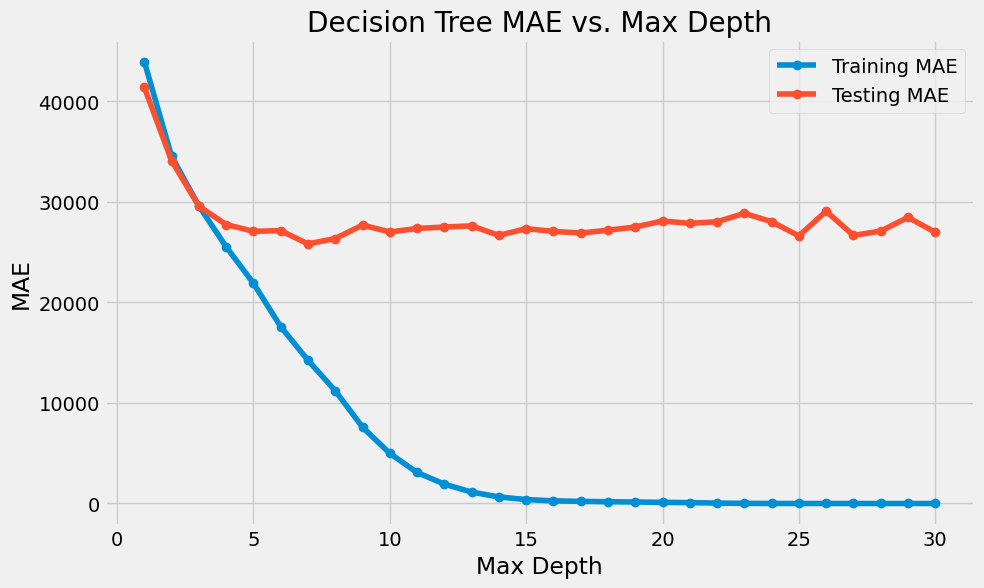

In [24]:

max_depths = range(1, 31)
train_mae = []
test_mae = []

for max_depth in max_depths:
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    train_predicted = model.predict(X_train)
    test_predicted = model.predict(testing_data[features])
    
    train_mae.append(mean_absolute_error(y_train, train_predicted))
    test_mae.append(mean_absolute_error(testing_data[target], test_predicted))

plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_mae, label='Training MAE', marker='o')
plt.plot(max_depths, test_mae, label='Testing MAE', marker='o')
plt.title("Decision Tree MAE vs. Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("MAE")
plt.legend()
plt.grid(True)
plt.show()

请你选择一个合理的树的最大深度，并给出理由
###### 

过拟合：当决策树的最大深度过大时，模型可能会过于复杂，学习到数据的细节和噪声，导致在训练集上表现良好但在测试集上表现较差。这是因为树的深度过大，导致它适应了训练数据中的随机变化，而不是真正的模式。

欠拟合：当决策树的最大深度过小时，模型可能会过于简单，无法捕获数据中的重要模式和关联。这会导致在训练集和测试集上都表现较差，因为模型没有足够的复杂性来适应数据。

数据规模：对于大规模数据集，深度较小的树可能足够，而对于小规模数据集，深度较大的树可能更好

经以上考虑最终选择了深度为10
